In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [49]:
df  = pd.read_csv(r"C:\Users\RupesH\Desktop\AIRLINEPASSENGER\airline_passenger_satisfaction.csv")

In [51]:
df.isnull().sum()[df.isnull().sum()>0]

Arrival_Delay    393
dtype: int64

In [52]:
df = df.dropna(axis= 0)

In [53]:
df.shape

(129487, 24)

In [3]:
df.head()

,ID,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,...,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
df.tail()

,ID,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,...,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [5]:
df.In_flight_Entertainment.value_counts()

4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: In_flight_Entertainment, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer_Type                           129880 non-null  object 
 4   Type_of_Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight_Distance                         129880 non-null  int64  
 7   Departure_Delay                         129880 non-null  int64  
 8   Arrival_Delay                           129487 non-null  float64
 9   Departure_and_Arrival_Time_Convenience  129880 non-null  int64  
 10  Ease_of_Online_Booking                  1298

In [7]:
df = df.drop(["ID"], axis=1)

In [8]:
df.Class.replace({"Economy":0,"Economy Plus":1, "Business":2}, inplace= True)
df["Type_of_Travel"].replace({"Personal":0, "Business":1}, inplace= True)

In [9]:
df = df.dropna(axis= 0)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df[df.select_dtypes(include = "object").columns] = df[df.select_dtypes(include = "object").columns].apply(le.fit_transform)

In [12]:
df.Gender.value_counts()

0    65703
1    63784
Name: Gender, dtype: int64

In [13]:
df.describe()

,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,...,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.492590,39.428761,0.816862,0.690764,1.029910,1190.210662,14.643385,15.091129,3.057349,2.756786,...,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886,0.434499
std,0.499947,15.117597,0.386781,0.462180,0.962638,997.560954,37.932867,38.465650,1.526787,1.401662,...,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082,0.495693
min,0.000000,7.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,27.000000,1.000000,0.000000,0.000000,414.000000,0.000000,0.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,0.000000,40.000000,1.000000,1.000000,1.000000,844.000000,0.000000,0.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,1.000000,51.000000,1.000000,1.000000,2.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,1.000000,85.000000,1.000000,1.000000,2.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [15]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [43]:
scaler.fit_transform(df[["Age","Flight_Distance","Departure_Delay","Arrival_Delay"]])

array([[ 0.56697318, -0.33125923, -0.17987114,  0.20351003],
       [-0.29295518, -0.33125923,  3.41978479, -0.49490886],
       [ 0.10393483, -0.29618611, -0.47984246, -0.49490886],
       ...,
       [ 0.17008317, -0.86174026,  0.42007152,  1.46066402],
       [ 0.69926985, -0.86174026, -0.47984246,  2.57813424],
       [-1.28518021, -0.86174026, -0.47984246, -0.49490886]])

(array([30318., 30869., 23483.,  8969.,  9582.,  6700.,  7809.,  4279.,
         3734.,  3744.]),
 array([  31. ,  401.8,  772.6, 1143.4, 1514.2, 1885. , 2255.8, 2626.6,
        2997.4, 3368.2, 3739. ]),
 <BarContainer object of 10 artists>)

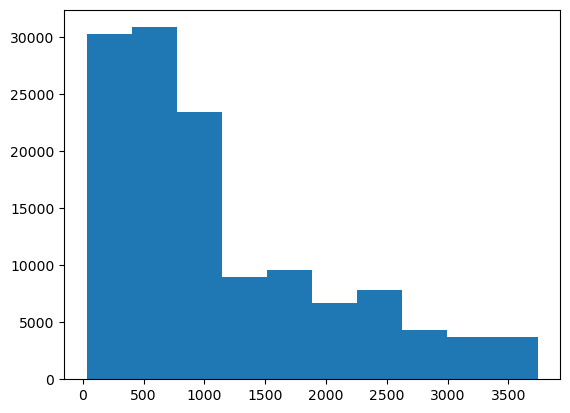

In [44]:
plt.hist(df["Flight_Distance"])

<Axes: >

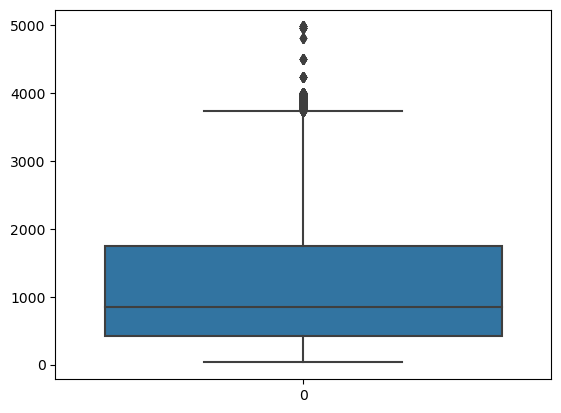

In [18]:
sns.boxplot(df["Flight_Distance"])

<Axes: >

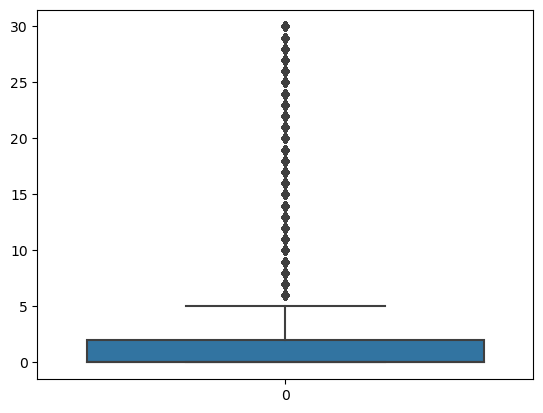

In [45]:
sns.boxplot(df["Departure_Delay"])

<Axes: >

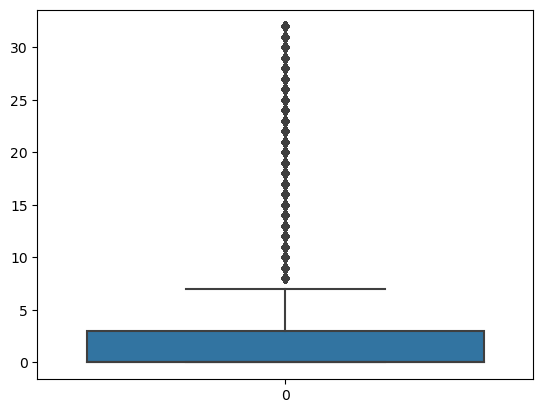

In [46]:
sns.boxplot(df["Arrival_Delay"])

In [21]:
for i in df.columns[:-1]:
  if df[i].dtype==object:
    continue
  else:
    q1=df[i].quantile(q=0.25)
    q3=df[i].quantile(q=0.75)
    iqr=q3-q1

    low=q1-1.5*(iqr)
    high=q3+1.5*(iqr)

    df.loc[(df[i]<low)|(df[i]>high),i]=df[i].median()

<Axes: >

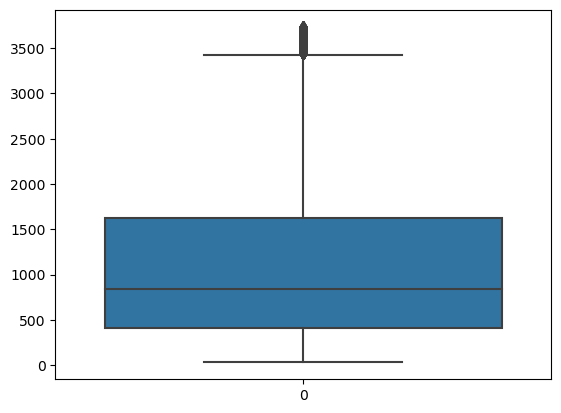

In [22]:
sns.boxplot(df["Flight_Distance"])

<Axes: >

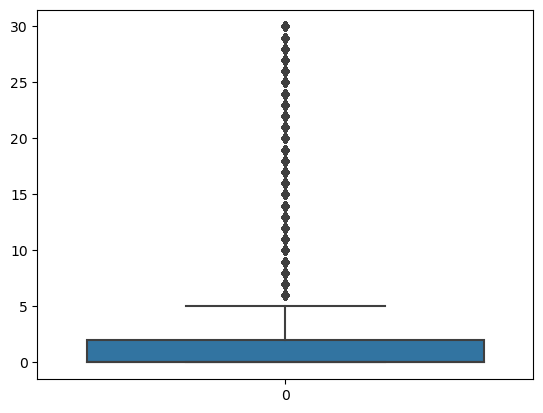

In [23]:
sns.boxplot(df["Departure_Delay"])

<Axes: >

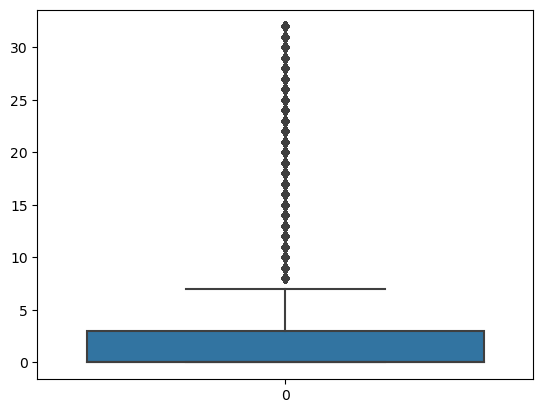

In [24]:
sns.boxplot(df["Arrival_Delay"])

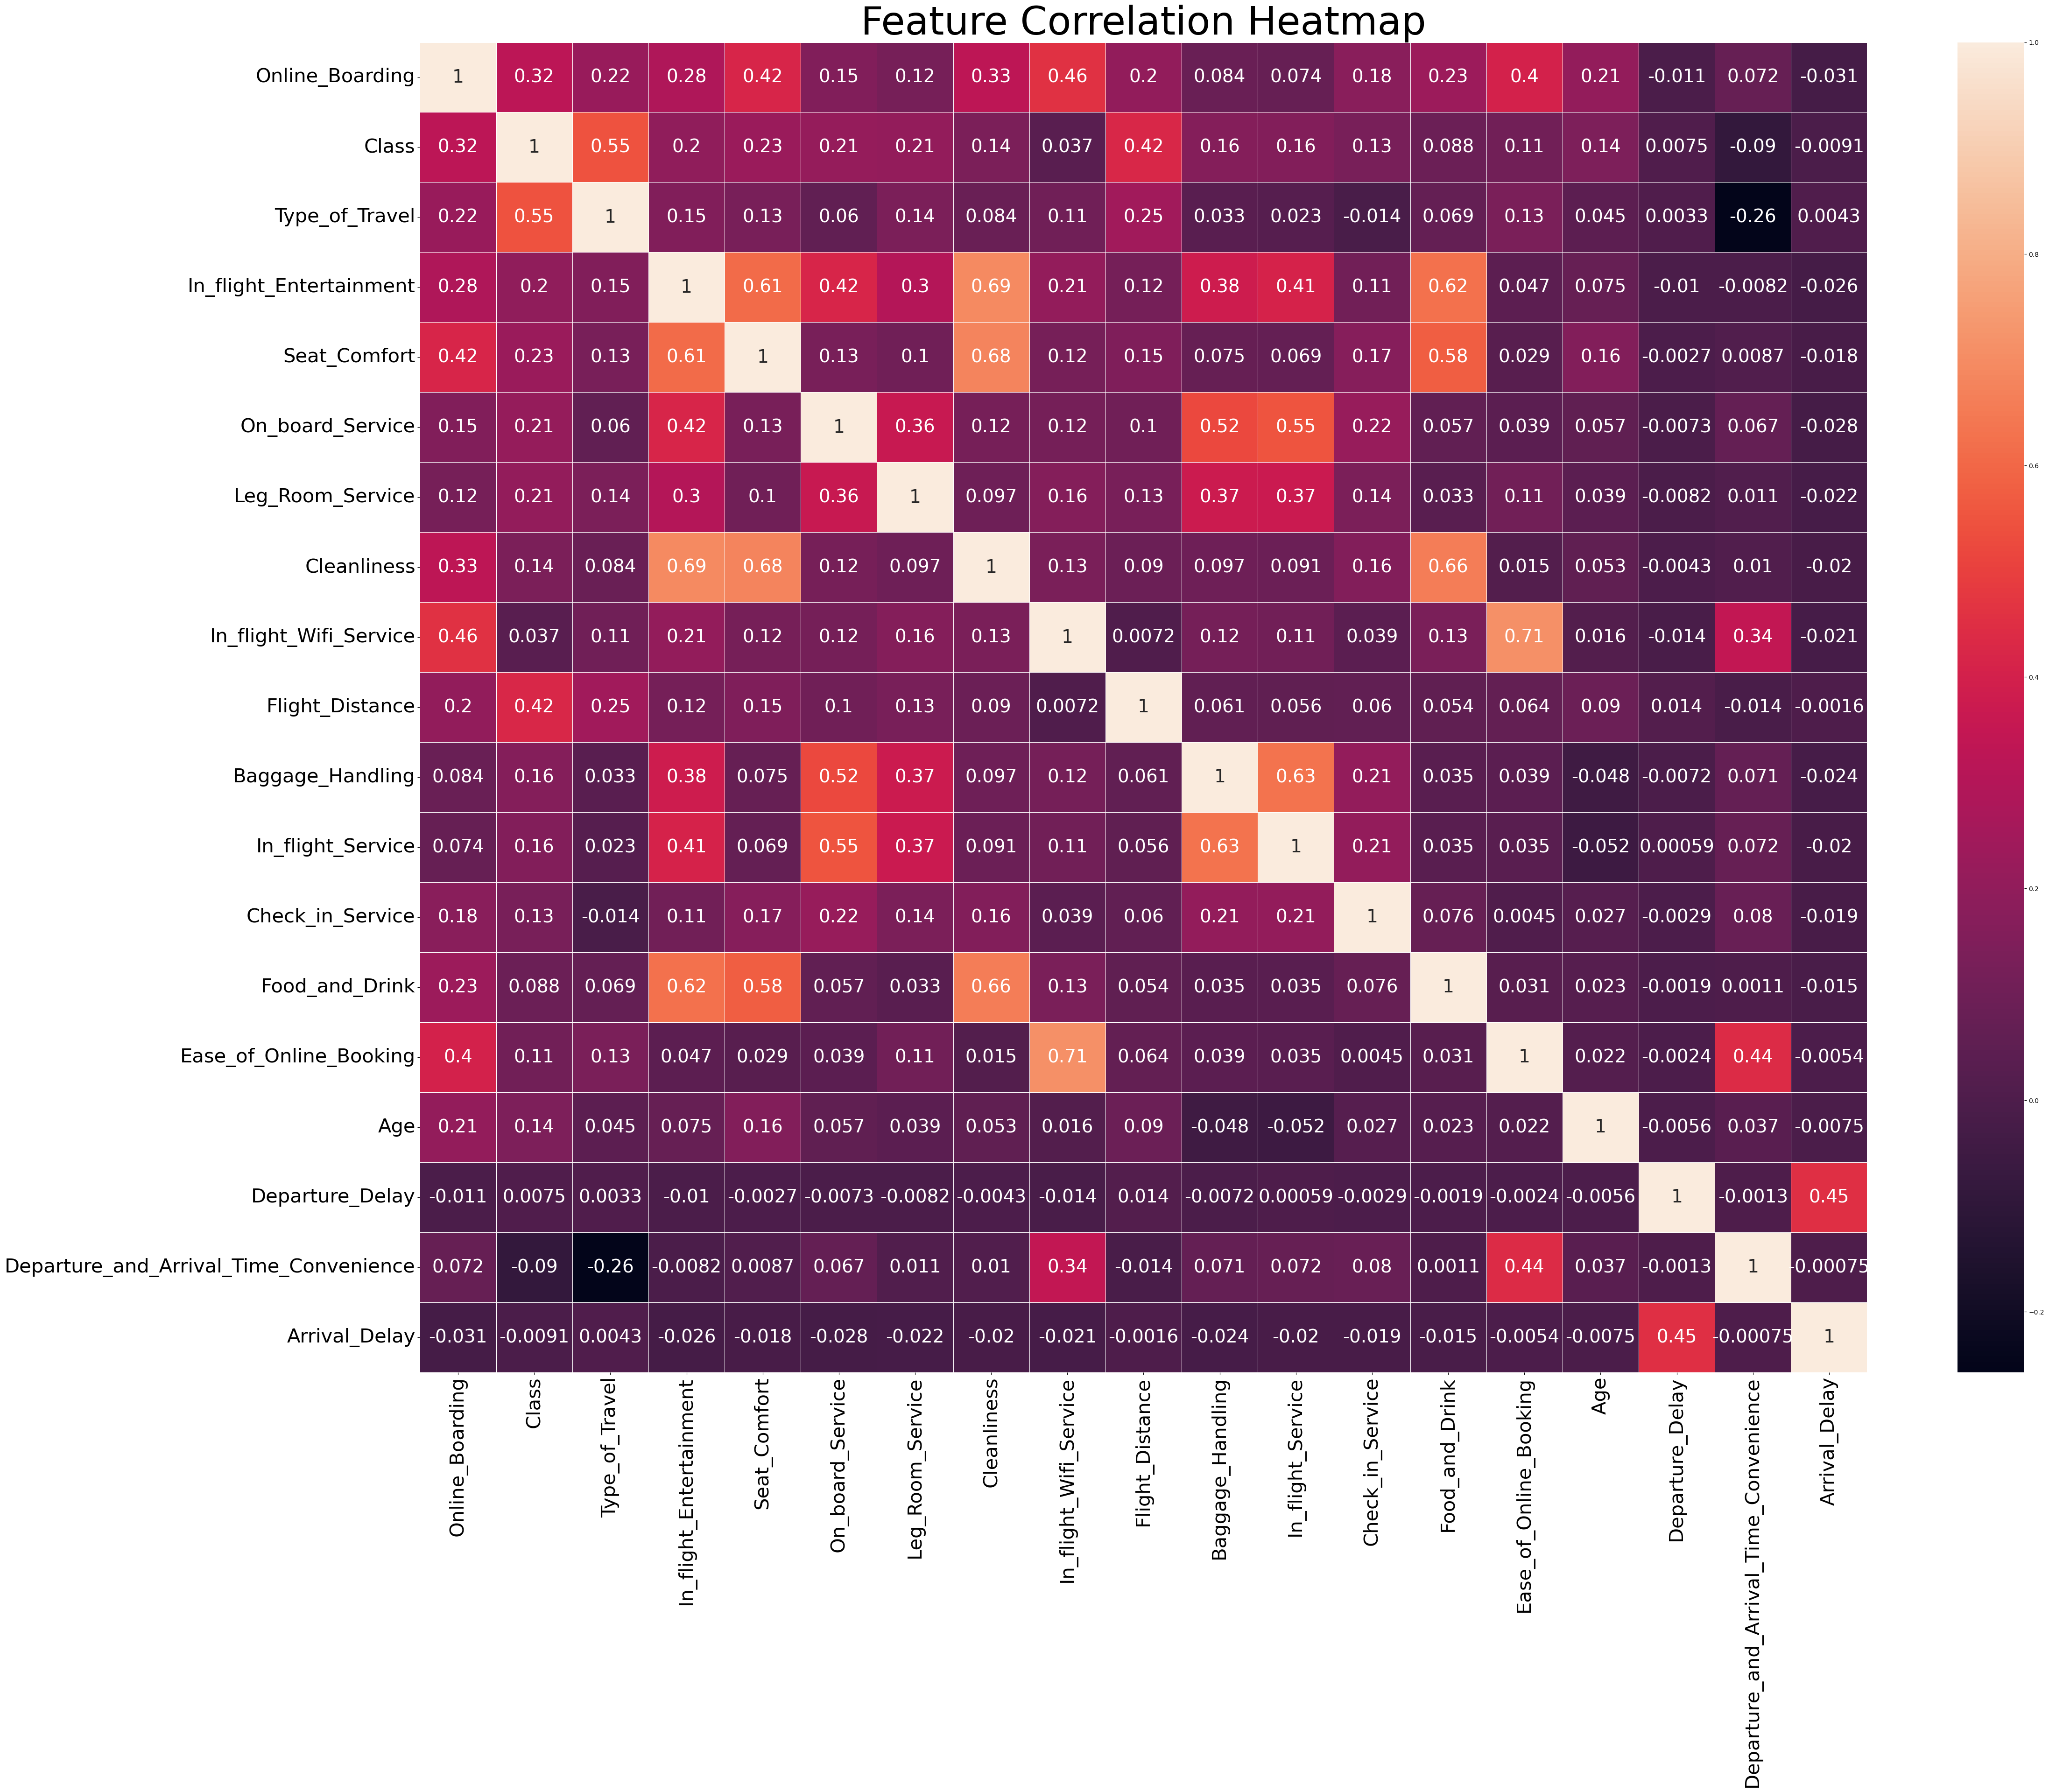

In [48]:
plt.figure(figsize=(50,37))
plt.title("Feature Correlation Heatmap", fontsize = 60)
sns.heatmap(df.drop(["Satisfaction"], axis=1).corr(),annot=True, linewidth=.5, fmt='.2g',annot_kws={'size': 28})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

In [27]:
x = df.drop(['Satisfaction'], axis = 1)
y = df.Satisfaction

In [28]:
correlation_values =[]
for i in x.columns:
    correlation_values.append(y.corr(x[i]))

In [29]:
feature_imp = pd.DataFrame()

In [30]:
feature_imp["features"] = x.columns
feature_imp["Imp"] = correlation_values

In [31]:
feature_imp.sort_values("Imp", ascending=False)

,features,Imp
11,Online_Boarding,0.501620
4,Class,0.493066
3,Type_of_Travel,0.449794
20,In_flight_Entertainment,0.398334
14,Seat_Comfort,0.348576
13,On_board_Service,0.322329
15,Leg_Room_Service,0.312557
16,Cleanliness,0.306891
19,In_flight_Wifi_Service,0.283291
5,Flight_Distance,0.277163


In [32]:
significant_list = list(feature_imp[(feature_imp.Imp > 0.02) | (feature_imp.Imp < -0.02)].sort_values(by = "Imp", ascending= False).features)

In [33]:
significant_list

['Online_Boarding',
 'Class',
 'Type_of_Travel',
 'In_flight_Entertainment',
 'Seat_Comfort',
 'On_board_Service',
 'Leg_Room_Service',
 'Cleanliness',
 'In_flight_Wifi_Service',
 'Flight_Distance',
 'Baggage_Handling',
 'In_flight_Service',
 'Check_in_Service',
 'Food_and_Drink',
 'Ease_of_Online_Booking',
 'Age',
 'Departure_Delay',
 'Departure_and_Arrival_Time_Convenience',
 'Arrival_Delay']

In [34]:
len(significant_list)

19

In [35]:
significant_list.append('Satisfaction')

In [36]:
significant_list

['Online_Boarding',
 'Class',
 'Type_of_Travel',
 'In_flight_Entertainment',
 'Seat_Comfort',
 'On_board_Service',
 'Leg_Room_Service',
 'Cleanliness',
 'In_flight_Wifi_Service',
 'Flight_Distance',
 'Baggage_Handling',
 'In_flight_Service',
 'Check_in_Service',
 'Food_and_Drink',
 'Ease_of_Online_Booking',
 'Age',
 'Departure_Delay',
 'Departure_and_Arrival_Time_Convenience',
 'Arrival_Delay',
 'Satisfaction']

In [37]:
df = df.loc[:, significant_list]

In [38]:
X = df.drop(['Satisfaction'], axis=1)
Y= df.Satisfaction

In [39]:
X_train, X_test, Y_train ,Y_test  = train_test_split(X, Y, test_size= 0.2)

In [40]:
rfc = RandomForestClassifier()
logreg = LogisticRegression()
dt = DecisionTreeClassifier()

In [41]:
models = [rfc, logreg, dt]
for model in models:
    model.fit(X_train, Y_train)

In [37]:
accuracy_scores = []
precision_scores = []
for model in models:
    from sklearn.metrics import accuracy_score, precision_score
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred, Y_test)
    accuracy_scores.append(accuracy)
    precision = precision_score(pred, Y_test)
    precision_scores.append(precision)
   

# Print the accuracy scores
print('Random Forest Classifier -- ','1.accuracy:', round(accuracy_scores[0]*100, 2),"%","     ",
                                     "2.Precision:" ,round(precision_scores[0]*100,2),"%")
print('Logistic Regression      -- ','1.accuracy:', round(accuracy_scores[1]*100,2),"%","     ",
                                       "2.Precision:", round(precision_scores[1]*100,2),"%")
print('Decision Tree Classifier -- ','1.accuracy:', round(accuracy_scores[2]*100,2),"%","     ",
                                     "2.Precision:", round(precision_scores[2]*100,2),"%")

Random Forest Classifier --  1.accuracy: 95.74 %       2.Precision: 93.35 %
Logistic Regression      --  1.accuracy: 78.96 %       2.Precision: 80.22 %
Decision Tree Classifier --  1.accuracy: 93.95 %       2.Precision: 92.99 %


In [47]:
rfc.feature_importances_

array([0.19828567, 0.10332571, 0.10411796, 0.05240887, 0.05133342,
       0.0334611 , 0.03957634, 0.02708327, 0.14679252, 0.04140497,
       0.02738313, 0.02441351, 0.01910827, 0.01513602, 0.03837726,
       0.03940331, 0.00931236, 0.01937825, 0.00969806])

In [38]:
import pickle

pickle.dump(rfc, open(r"C:\Users\RupesH\Desktop\AIRLINEPASSENGER\build.pkl",'wb'))